# Example of an imbalanced dataset

## Loading data

In [1]:
import pandas as pd
df = pd.read_csv('abalone19.dat')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4174 entries, 0 to 4173
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4174 non-null   object 
 1   Length          4174 non-null   float64
 2   Diameter        4174 non-null   float64
 3   Height          4174 non-null   float64
 4   Whole_weight    4174 non-null   float64
 5   Shucked_weight  4174 non-null   float64
 6   Viscera_weight  4174 non-null   float64
 7   Shell_weight    4174 non-null   float64
 8   Class           4174 non-null   object 
dtypes: float64(7), object(2)
memory usage: 293.6+ KB


## Transforming categorical columns

In [2]:
df['Sex'].value_counts()

M    1526
I    1341
F    1307
Name: Sex, dtype: int64

In [3]:
df['Class'].value_counts()

negative    4142
positive      32
Name: Class, dtype: int64

In [4]:
df['Class'] = df['Class'].map(lambda x: 0 if x == 'negative' else 1)
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)
df

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,0,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,0,1,0
...,...,...,...,...,...,...,...,...,...,...
4169,0.560,0.430,0.155,0.8675,0.4000,0.1720,0.2290,0,0,1
4170,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,0,0,0
4171,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,0,0,1
4172,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,0,0,1


In [5]:
df['Class'].value_counts(normalize=True)

0    0.992333
1    0.007667
Name: Class, dtype: float64

<AxesSubplot:>

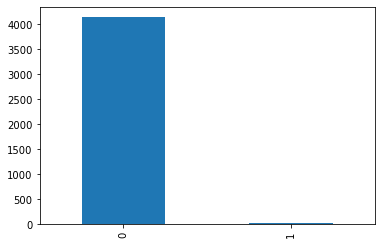

In [6]:
df['Class'].value_counts().plot(kind='bar')

## Splitting training and test sets

In [7]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.2, stratify=df['Class'], random_state=888)

features = df_train.drop(columns=['Class']).columns

In [8]:
df_train['Class'].value_counts()

0    3313
1      26
Name: Class, dtype: int64

In [9]:
df_test['Class'].value_counts()

0    829
1      6
Name: Class, dtype: int64

# Oversampling

## Simple random oversampling

### pandas

In [10]:
msk = df_train['Class'] == 1
num_to_oversample = len(df_train) - 2*msk.sum()
df_positive_oversample = df_train[msk].sample(n=num_to_oversample, replace=True, random_state=888)
df_train_oversample = pd.concat([df_train, df_positive_oversample])
df_train_oversample['Class'].value_counts()

0    3313
1    3313
Name: Class, dtype: int64

In [11]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=888)

clf.fit(df_train_oversample[features], df_train_oversample['Class'])
y_pred = clf.predict_proba(df_test[features])[:, 1]

from sklearn.metrics import roc_auc_score
roc_auc_score(df_test['Class'], y_pred)

0.838962605548854

### imbalanced-learn

In [12]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=888)
X_resampled, y_resampled = ros.fit_resample(df_train[features], df_train['Class'])
y_resampled.value_counts()

0    3313
1    3313
Name: Class, dtype: int64

In [13]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=888)

clf.fit(X_resampled, y_resampled)
y_pred = clf.predict_proba(df_test[features])[:, 1]

from sklearn.metrics import roc_auc_score
roc_auc_score(df_test['Class'], y_pred)

0.838962605548854

## Oversampling with shrinkage

In [14]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=888, shrinkage=0.1)
X_resampled, y_resampled = ros.fit_resample(df_train[features], df_train['Class'])

y_resampled.value_counts()

0    3313
1    3313
Name: Class, dtype: int64

In [15]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=888)

clf.fit(X_resampled, y_resampled)
y_pred = clf.predict_proba(df_test[features])[:, 1]

from sklearn.metrics import roc_auc_score
roc_auc_score(df_test['Class'], y_pred)

0.8059911540008041

## Oversampling using SMOTE (Synthetic Minority Over-sampling TEchnique)

In [16]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=888)
X_resampled, y_resampled = smote.fit_resample(df_train[features], df_train['Class'])

y_resampled.value_counts()

0    3313
1    3313
Name: Class, dtype: int64

In [17]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=888)

clf.fit(X_resampled, y_resampled)
y_pred = clf.predict_proba(df_test[features])[:, 1]

from sklearn.metrics import roc_auc_score
roc_auc_score(df_test['Class'], y_pred)

0.7913148371531966

# Undersampling

## Simple random undersampling

### pandas

In [18]:
msk_negative = df_train['Class'] == 0
msk_positive = df_train['Class'] == 1

df_negative_undersample = df_train[msk_negative].sample(n=msk_positive.sum(), random_state=888)
df_train_undersample = pd.concat([df_negative_undersample, df_train[msk_positive]])

df_train_undersample['Class'].value_counts()

0    26
1    26
Name: Class, dtype: int64

In [19]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=888)

clf.fit(df_train_undersample[features], df_train_undersample['Class'])
y_pred = clf.predict_proba(df_test[features])[:, 1]

from sklearn.metrics import roc_auc_score
roc_auc_score(df_test['Class'], y_pred)

0.6465621230398071

### imbalanced-learn

In [20]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=888)
X_resampled, y_resampled = rus.fit_resample(df_train[features], df_train['Class'])

y_resampled.value_counts()

0    26
1    26
Name: Class, dtype: int64

In [21]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=888)

clf.fit(X_resampled, y_resampled)
y_pred = clf.predict_proba(df_test[features])[:, 1]

from sklearn.metrics import roc_auc_score
roc_auc_score(df_test['Class'], y_pred)

0.6465621230398071

## Undersampling using K-Means/Cluster Centroids

In [22]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(random_state=888)
X_resampled, y_resampled = cc.fit_resample(df_train[features], df_train['Class'])

y_resampled.value_counts()

0    26
1    26
Name: Class, dtype: int64

In [23]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=888)

clf.fit(X_resampled, y_resampled)
y_pred = clf.predict_proba(df_test[features])[:, 1]

from sklearn.metrics import roc_auc_score
roc_auc_score(df_test['Class'], y_pred)

0.6377161238439888

## Undersampling using Tomek links

In [24]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks()
X_resampled, y_resampled = tl.fit_resample(df_train[features], df_train['Class'])

y_resampled.value_counts()

0    3298
1      26
Name: Class, dtype: int64

In [25]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=888)

clf.fit(X_resampled, y_resampled)
y_pred = clf.predict_proba(df_test[features])[:, 1]

from sklearn.metrics import roc_auc_score
roc_auc_score(df_test['Class'], y_pred)

0.683956574185766

# Combining Oversampling and Undersampling

### SMOTE and Tomek links

In [26]:
from imblearn.combine import SMOTETomek

smote_tomek = SMOTETomek(random_state=888)
X_resampled, y_resampled = smote_tomek.fit_resample(df_train[features], df_train['Class'])

y_resampled.value_counts()

0    3309
1    3309
Name: Class, dtype: int64

In [27]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=888)

clf.fit(X_resampled, y_resampled)
y_pred = clf.predict_proba(df_test[features])[:, 1]

from sklearn.metrics import roc_auc_score
roc_auc_score(df_test['Class'], y_pred)

0.7913148371531966

# Weighing classes differently

In [28]:
from sklearn.utils import compute_class_weight

weights = compute_class_weight('balanced', classes=df_train['Class'].unique(), y=df_train['Class'])
weights

array([ 0.50392394, 64.21153846])

In [29]:
print((df_train['Class'] == 0).sum()*weights[0])

print((df_train['Class'] == 1).sum()*weights[1])

1669.5
1669.5000000000002


In [30]:
print((df_train['Class'] == 0).sum()*weights[0] + (df_train['Class'] == 1).sum()*weights[1])

print((df_train['Class'] == 0).sum() + (df_train['Class'] == 1).sum())

3339.0
3339


In [31]:
from sklearn.linear_model import LogisticRegression

clf_weighted = LogisticRegression(class_weight='balanced', random_state=888)
clf_weighted.fit(df_train[features], df_train['Class'])

y_pred = clf_weighted.predict_proba(df_test[features])[:, 1]

from sklearn.metrics import roc_auc_score
roc_auc_score(df_test['Class'], y_pred)

0.8275030156815439

In [32]:
from sklearn.linear_model import LogisticRegression

clf_weighted = LogisticRegression(class_weight={0: 1, 1: 100}, random_state=888)

clf_weighted.fit(df_train[features], df_train['Class'])
y_pred = clf_weighted.predict_proba(df_test[features])[:, 1]

from sklearn.metrics import roc_auc_score
roc_auc_score(df_test['Class'], y_pred)

0.8375552874949739

# Using original training dataset

In [33]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=888)

features = df_train.drop(columns=['Class']).columns
clf.fit(df_train[features], df_train['Class'])

y_pred = clf.predict_proba(df_test[features])[:, 1]

from sklearn.metrics import roc_auc_score
roc_auc_score(df_test['Class'], y_pred)

0.683956574185766